<a href="https://colab.research.google.com/github/kolllurisiripavan/House-Hold-Prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #FCD299; padding: 25px; border-radius: 15px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #ffffff; font-size: 40px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">House Price Prediction</h2>

</div>

<div style="background-color: #FCD299; padding: 20px; border-radius: 15px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #ffffff; font-size: 30px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Import Library</h2>

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Load Dataset</h2>

</div>

In [2]:
df=pd.read_csv("MagicBricks.csv")

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Top 3 data</h2>

</div>

In [3]:
df.head(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,Builder_Floor,NaN,6500000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,Apartment,6667.0,5000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,Apartment,6667.0,15500000


<div style="background-color: #FCD299; padding: 20px; border-radius: 15px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #ffffff; font-size: 30px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Describe Data</h2>

</div>

Area: The total built-up area of the property (usually in square feet).

BHK: Number of bedrooms, halls, and kitchens in the property.

Bathroom: Total number of bathrooms in the property.

Furnishing: Indicates whether the property is furnished, semi-furnished, or unfurnished.

Locality: The specific area or neighborhood where the property is located.

Parking: Availability of parking space(s) for vehicles.

Status: Current condition of the property (e.g., ready to move, under construction).

Transaction: Whether the property is a new booking or a resale.

Type: Type of property (e.g., apartment, villa, independent house).

Per_Sqft: Price per square foot of the property.

Price: Total selling price of the property.



<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Size of Data</h2>

</div>

In [5]:
df.shape

(1259, 11)

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Check the data type</h2>

</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1254 non-null   object 
 9   Per_Sqft     1018 non-null   float64
 10  Price        1259 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Describe the Numerical Data</h2>

</div>

In [7]:
df.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Price
count,1259.000000,1259.000000,1257.000000,1226.000000,1018.000000,1.259000e+03
mean,1466.452724,2.796664,2.556086,1.935563,15690.136542,2.130670e+07
std,1568.055040,0.954425,1.042220,6.279212,21134.738568,2.560115e+07
min,28.000000,1.000000,1.000000,1.000000,1259.000000,1.000000e+06
25%,800.000000,2.000000,2.000000,1.000000,6364.000000,5.700000e+06
50%,1200.000000,3.000000,2.000000,1.000000,11291.500000,1.420000e+07
75%,1700.000000,3.000000,3.000000,2.000000,18000.000000,2.550000e+07
max,24300.000000,10.000000,7.000000,114.000000,183333.000000,2.400000e+08


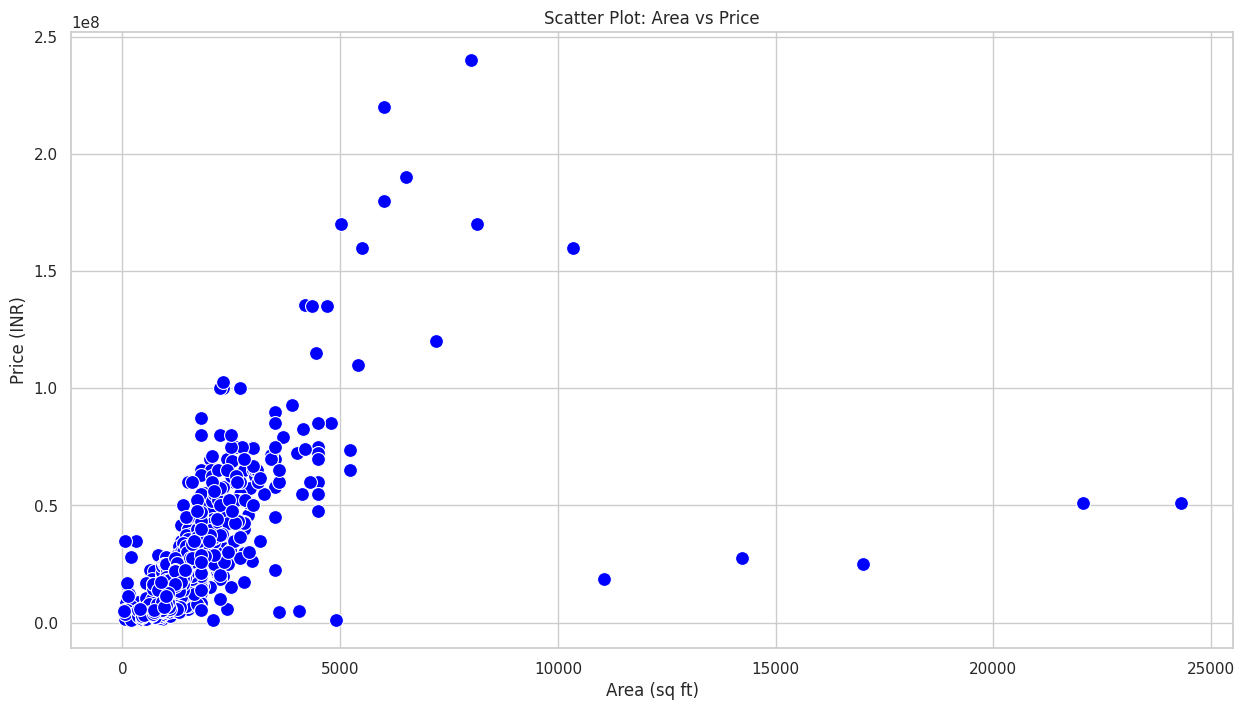

In [8]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.scatterplot(x='Area', y='Price', data=df, color='blue', s=100)

plt.title('Scatter Plot: Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.show()


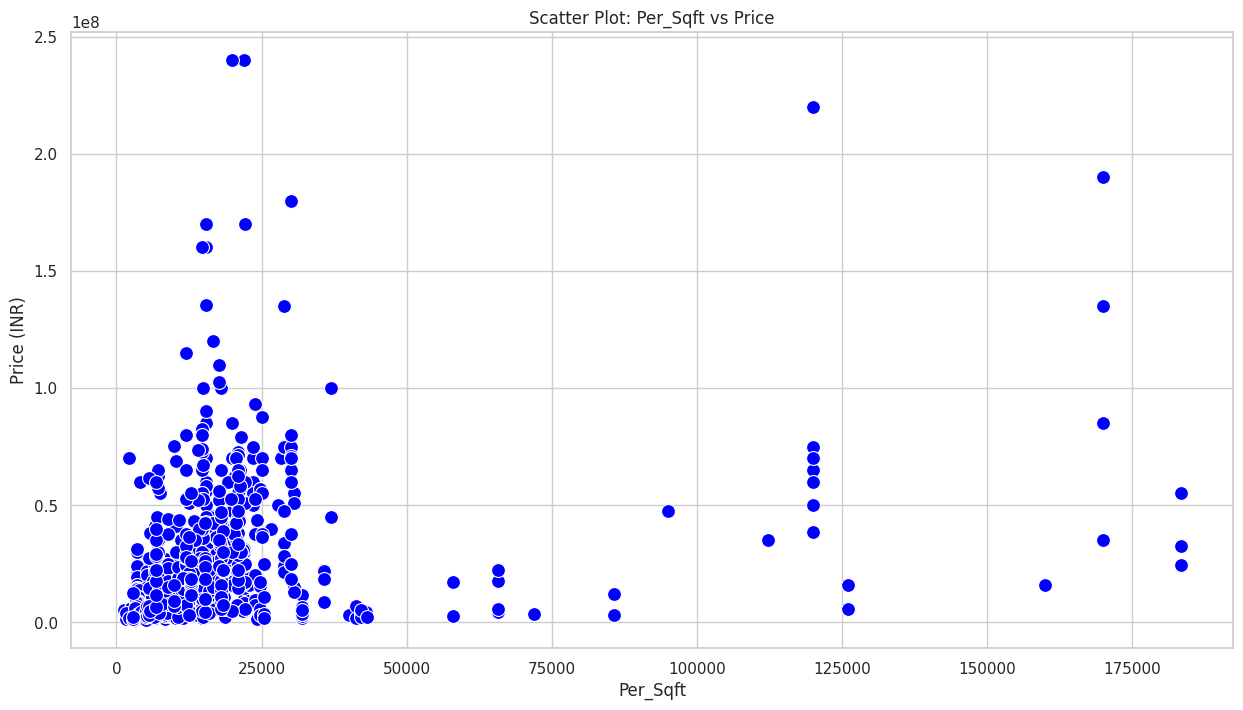

In [9]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.scatterplot(x='Per_Sqft', y='Price', data=df, color='blue', s=100)

plt.title('Scatter Plot: Per_Sqft vs Price')
plt.xlabel('Per_Sqft')
plt.ylabel('Price (INR)')
plt.show()


<div style="background-color: #FCD299; padding: 20px; border-radius: 15px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #ffffff; font-size: 30px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Data Cleaning</h2>

</div>

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Check the Null Value</h2>

</div>

In [10]:
df.isnull().sum()

,0
Area,0
BHK,0
Bathroom,2
Furnishing,5
Locality,0
Parking,33
Status,0
Transaction,0
Type,5
Per_Sqft,241


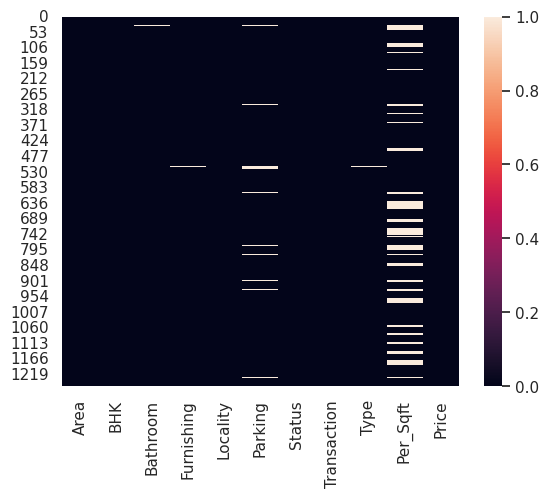

In [11]:
sns.heatmap(df.isnull())
plt.show()

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Per_sqft has almost maximum of null value. We will fill them</h2>

</div>

In [12]:
a=pd.DataFrame(df["Price"]//df["Area"],columns=["x"])

In [13]:
a.head()

,x
0,8125.0
1,6666.0
2,16315.0
3,7000.0
4,9538.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
df["Per_Sqft"]=a["x"]

In [15]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,Builder_Floor,8125.0,6500000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,Apartment,6666.0,5000000
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,Apartment,16315.0,15500000
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,Builder_Floor,7000.0,4200000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,Ready_to_move,New_Property,Builder_Floor,9538.0,6200000


In [16]:
df.isnull().sum()

,0
Area,0
BHK,0
Bathroom,2
Furnishing,5
Locality,0
Parking,33
Status,0
Transaction,0
Type,5
Per_Sqft,0


<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Drop other null Value</h2>

</div>

In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

,0
Area,0
BHK,0
Bathroom,0
Furnishing,0
Locality,0
Parking,0
Status,0
Transaction,0
Type,0
Per_Sqft,0


In [19]:
df.shape

(1225, 11)

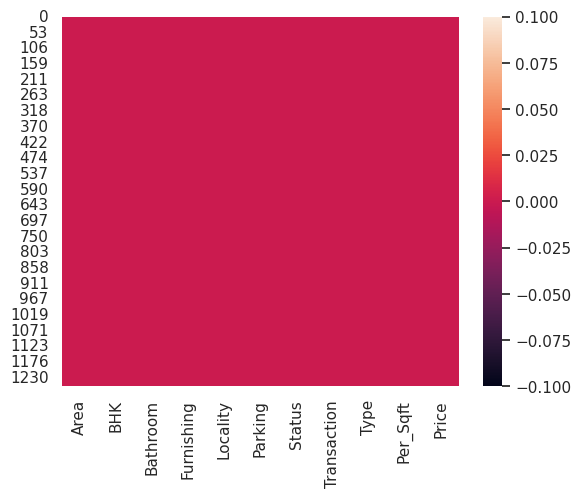

In [20]:
sns.heatmap(df.isnull())
plt.show()

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Finding Duplicate</h2>

</div>

In [21]:
df.duplicated().sum()

np.int64(103)

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Drop Duplicate Value</h2>

</div>

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.shape

(1122, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1122 non-null   float64
 1   BHK          1122 non-null   int64  
 2   Bathroom     1122 non-null   float64
 3   Furnishing   1122 non-null   object 
 4   Locality     1122 non-null   object 
 5   Parking      1122 non-null   float64
 6   Status       1122 non-null   object 
 7   Transaction  1122 non-null   object 
 8   Type         1122 non-null   object 
 9   Per_Sqft     1122 non-null   float64
 10  Price        1122 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 105.2+ KB


<div style="background-color: #FCD299; padding: 20px; border-radius: 15px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #ffffff; font-size: 30px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Exploratory Data Analysis</h2>

</div>

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Convert float to int</h2>

</div>

In [25]:
df[['Parking','Bathroom','Per_Sqft','Area']]=df[['Parking','Bathroom','Per_Sqft','Area']].astype('int64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         1122 non-null   int64 
 1   BHK          1122 non-null   int64 
 2   Bathroom     1122 non-null   int64 
 3   Furnishing   1122 non-null   object
 4   Locality     1122 non-null   object
 5   Parking      1122 non-null   int64 
 6   Status       1122 non-null   object
 7   Transaction  1122 non-null   object
 8   Type         1122 non-null   object
 9   Per_Sqft     1122 non-null   int64 
 10  Price        1122 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 105.2+ KB


In [27]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,800,3,2,Semi-Furnished,Rohini Sector 25,1,Ready_to_move,New_Property,Builder_Floor,8125,6500000
1,750,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,Ready_to_move,New_Property,Apartment,6666,5000000
2,950,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,Ready_to_move,Resale,Apartment,16315,15500000
3,600,2,2,Semi-Furnished,Rohini Sector 24,1,Ready_to_move,Resale,Builder_Floor,7000,4200000
4,650,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,Ready_to_move,New_Property,Builder_Floor,9538,6200000


<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Correlation</h2>

</div>

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical columns to numerical using Label Encoding
categorical_cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Now you can calculate the correlation
round(df.corr(), 3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
Area,1.000,0.462,0.551,-0.010,0.028,-0.011,-0.106,-0.104,0.087,0.019,0.592
BHK,0.462,1.000,0.779,-0.125,0.056,-0.072,-0.090,-0.124,0.104,0.211,0.579
Bathroom,0.551,0.779,1.000,-0.028,0.030,-0.035,-0.119,-0.186,0.135,0.265,0.740
Furnishing,-0.010,-0.125,-0.028,1.000,-0.012,0.080,-0.068,-0.037,0.033,-0.030,0.005
Locality,0.028,0.056,0.030,-0.012,1.000,0.012,-0.057,-0.027,0.082,0.007,0.038
Parking,-0.011,-0.072,-0.035,0.080,0.012,1.000,0.015,0.033,-0.084,0.002,-0.001
Status,-0.106,-0.090,-0.119,-0.068,-0.057,0.015,1.000,0.240,0.023,-0.080,-0.141
Transaction,-0.104,-0.124,-0.186,-0.037,-0.027,0.033,0.240,1.000,-0.252,-0.123,-0.214
Type,0.087,0.104,0.135,0.033,0.082,-0.084,0.023,-0.252,1.000,0.033,0.112
Per_Sqft,0.019,0.211,0.265,-0.030,0.007,0.002,-0.080,-0.123,0.033,1.000,0.338


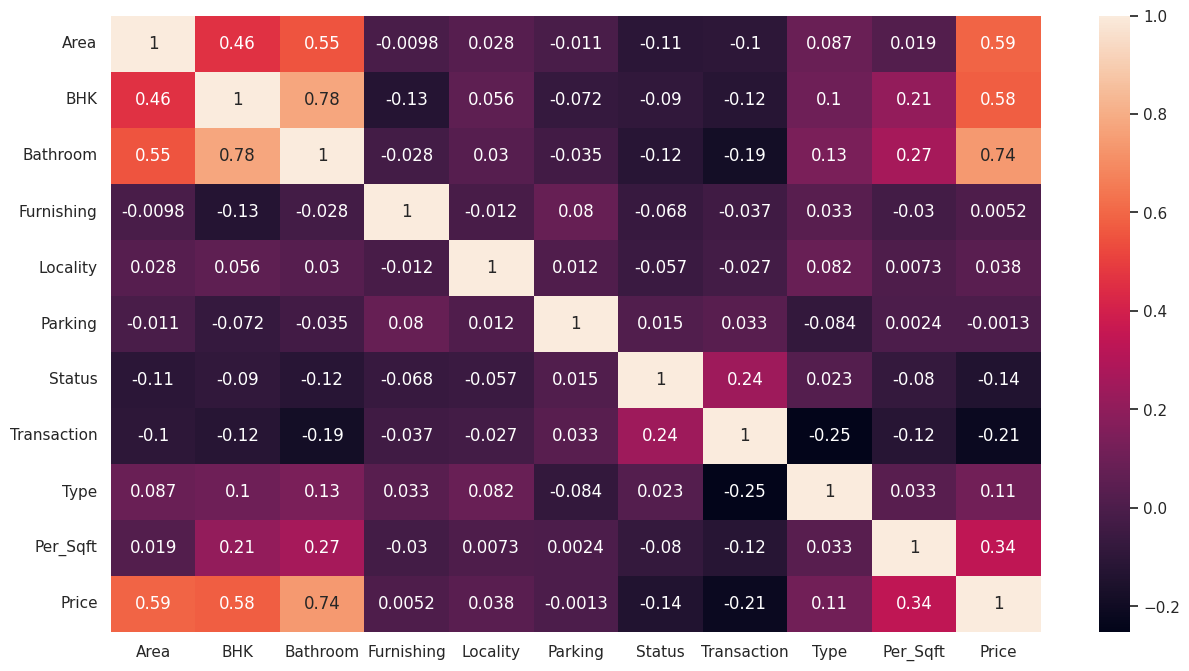

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
df.nunique()

,0
Area,310
BHK,8
Bathroom,7
Furnishing,3
Locality,353
Parking,9
Status,2
Transaction,2
Type,2
Per_Sqft,781


<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Data Visualization</h2>

</div>

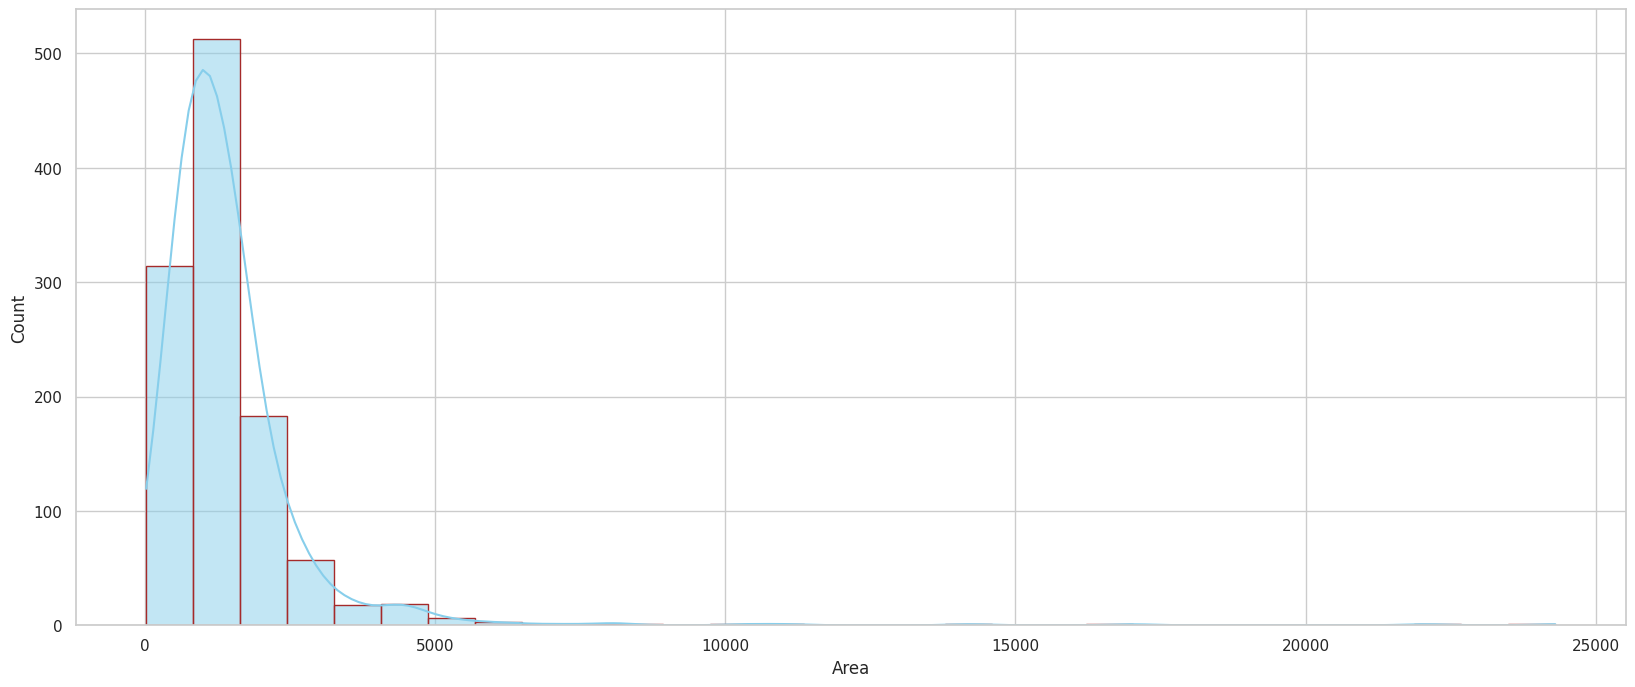

In [33]:
plt.figure(figsize=(20,8))
sns.histplot(df["Area"], bins=30, kde=True, color='skyblue', edgecolor='Brown')
plt.show()

In [34]:
df["BHK"].value_counts()

,count
BHK,
3,480
2,327
4,197
1,90
5,20
6,6
7,1
10,1


In [35]:
df["BHK"].value_counts()[0:5]

,count
BHK,
3,480
2,327
4,197
1,90
5,20


In [36]:
list(df["BHK"].value_counts()[0:5].keys())

[3, 2, 4, 1, 5]

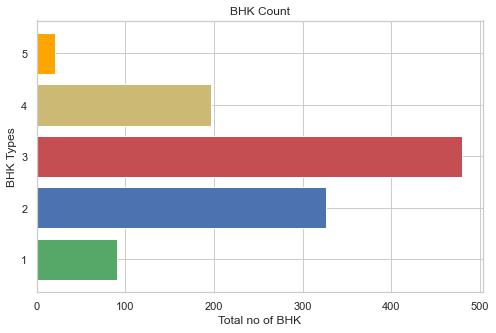

In [ ]:
plt.figure(figsize=(8,5))
plt.title("BHK Count")
plt.xlabel("Total no of BHK")
plt.ylabel("BHK Types")
plt.barh(list(df["BHK"].value_counts()[0:5].keys()),list(df["BHK"].value_counts()[0:5]),color=['r','b','y','g','orange'])
plt.show()

In [37]:
df["Bathroom"].value_counts()

,count
Bathroom,
2,488
3,313
1,134
4,124
5,55
6,5
7,3


In [38]:
list(df["Bathroom"].value_counts().keys())

[2, 3, 1, 4, 5, 6, 7]

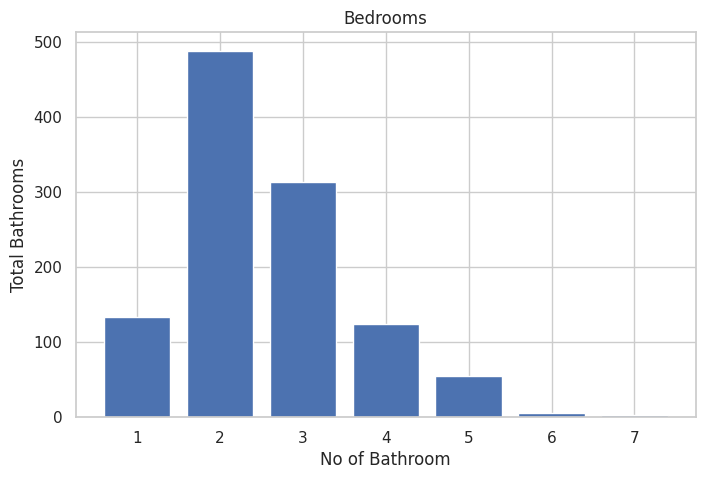

In [39]:
plt.figure(figsize=(8,5))
plt.title("Bedrooms")
plt.xlabel("No of Bathroom")
plt.ylabel("Total Bathrooms")
plt.bar(list(df["Bathroom"].value_counts().keys()),list(df["Bathroom"].value_counts()))
plt.show()

In [40]:
df["Furnishing"].value_counts()

,count
Furnishing,
1,640
2,314
0,168


In [41]:
list(df["Furnishing"].value_counts().keys())

[1, 2, 0]

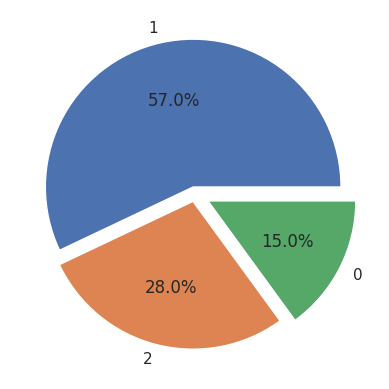

In [42]:
plt.pie(df["Furnishing"].value_counts(),labels=list(df["Furnishing"].value_counts().keys()),autopct="%0.1f%%",explode=[0.05,0.05,0.1])
plt.show()

In [43]:
df["Parking"].value_counts()

,count
Parking,
1,718
2,317
3,54
4,14
5,7
39,7
114,3
9,1
10,1


In [44]:
list(df["Parking"].value_counts()[0:5].keys())

[1, 2, 3, 4, 5]

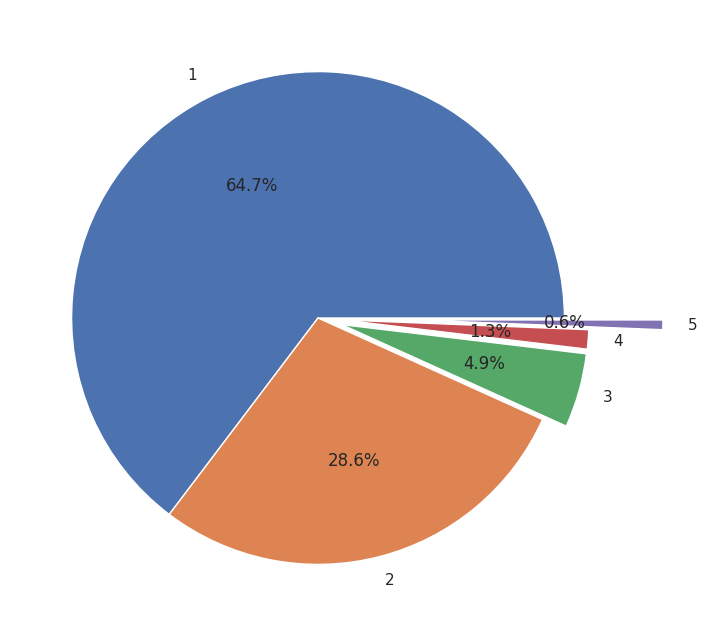

In [45]:
plt.figure(figsize=(10,8))
plt.pie(df["Parking"].value_counts()[0:5],labels=list(df["Parking"].value_counts()[0:5].keys()),autopct="%0.1f%%",explode=[0,0,0.1,0.1,0.4])
plt.show()

In [46]:
df["Status"].value_counts()

,count
Status,
1,1066
0,56


In [47]:
list(df["Status"].value_counts().keys())

[1, 0]

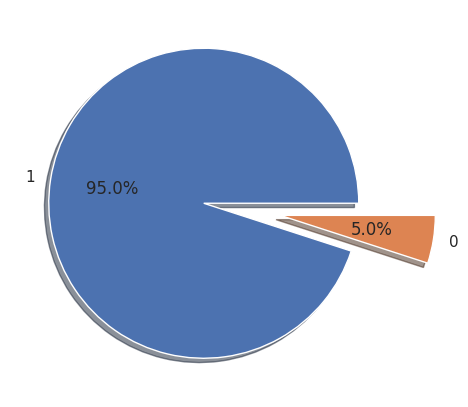

In [48]:
plt.figure(figsize=(5,6))
plt.pie(df["Status"].value_counts(),labels=list(df["Status"].value_counts().keys()),autopct="%0.1f%%",explode=[0,0.5],shadow=True)
plt.show()

In [49]:
df["Transaction"].value_counts()

,count
Transaction,
1,707
0,415


In [50]:
list(df["Transaction"].value_counts().keys())

[1, 0]

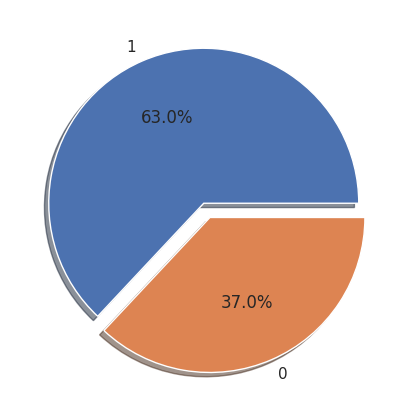

In [51]:
plt.figure(figsize=(5,6))
plt.pie(df["Transaction"].value_counts(),labels=list(df["Transaction"].value_counts().keys()),autopct="%0.1f%%",explode=[0,0.1],shadow=True)
plt.show()

In [52]:
df["Type"].value_counts()

,count
Type,
1,617
0,505


In [53]:
list(df["Type"].value_counts().keys())

[1, 0]

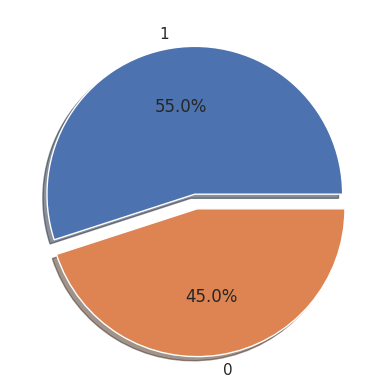

In [54]:
plt.pie(df["Type"].value_counts(),labels=list(df["Type"].value_counts().keys()),autopct="%0.1f%%",shadow=True,explode=[0,0.1])
plt.show()

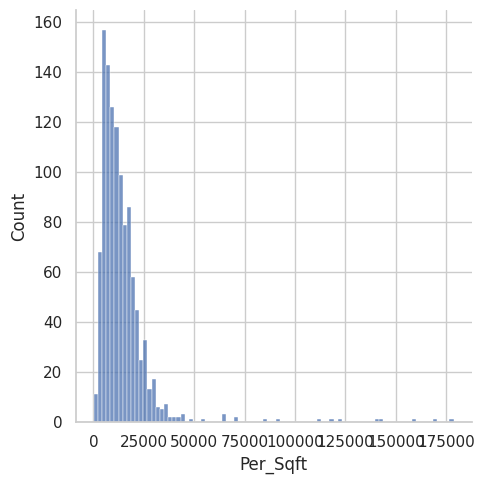

In [55]:
sns.displot(df['Per_Sqft'])
plt.show()

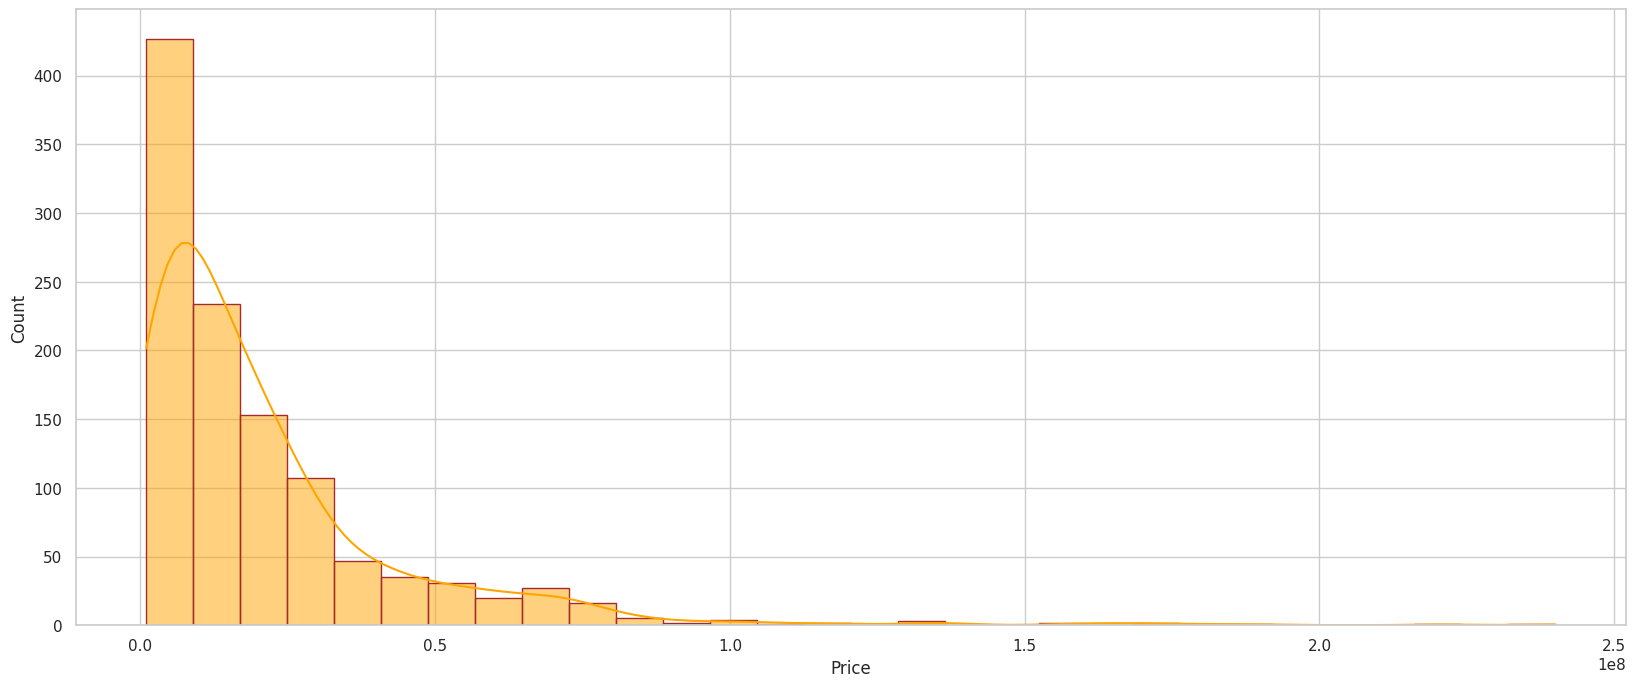

In [56]:
plt.figure(figsize=(20,8))
sns.histplot(df["Price"], bins=30, kde=True, color='orange', edgecolor='Brown')
plt.show()

In [57]:
df["Price"].max(),df["Price"].min()

(240000000, 1000000)

In [58]:
df["Per_Sqft"].max(),df["Per_Sqft"].min()

(178571, 204)

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Convert categorical data to numerical</h2>

</div>

In [59]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking',
       'Status', 'Transaction', 'Type', 'Per_Sqft', 'Price'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Area         1122 non-null   int64
 1   BHK          1122 non-null   int64
 2   Bathroom     1122 non-null   int64
 3   Furnishing   1122 non-null   int64
 4   Locality     1122 non-null   int64
 5   Parking      1122 non-null   int64
 6   Status       1122 non-null   int64
 7   Transaction  1122 non-null   int64
 8   Type         1122 non-null   int64
 9   Per_Sqft     1122 non-null   int64
 10  Price        1122 non-null   int64
dtypes: int64(11)
memory usage: 137.5 KB


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
df["Furnishing"]=le.fit_transform(df["Furnishing"])

In [64]:
df["Locality"]=le.fit_transform(df["Locality"])
df["Status"]=le.fit_transform(df["Status"])
df["Transaction"]=le.fit_transform(df["Transaction"])
df["Type"]=le.fit_transform(df["Type"])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Area         1122 non-null   int64
 1   BHK          1122 non-null   int64
 2   Bathroom     1122 non-null   int64
 3   Furnishing   1122 non-null   int64
 4   Locality     1122 non-null   int64
 5   Parking      1122 non-null   int64
 6   Status       1122 non-null   int64
 7   Transaction  1122 non-null   int64
 8   Type         1122 non-null   int64
 9   Per_Sqft     1122 non-null   int64
 10  Price        1122 non-null   int64
dtypes: int64(11)
memory usage: 137.5 KB


In [66]:
df[['Furnishing','Locality','Status','Transaction','Type']]=df[['Furnishing','Locality','Status','Transaction','Type']].astype('int64')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Area         1122 non-null   int64
 1   BHK          1122 non-null   int64
 2   Bathroom     1122 non-null   int64
 3   Furnishing   1122 non-null   int64
 4   Locality     1122 non-null   int64
 5   Parking      1122 non-null   int64
 6   Status       1122 non-null   int64
 7   Transaction  1122 non-null   int64
 8   Type         1122 non-null   int64
 9   Per_Sqft     1122 non-null   int64
 10  Price        1122 non-null   int64
dtypes: int64(11)
memory usage: 137.5 KB


In [68]:
df.head(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,800,3,2,1,274,1,1,0,1,8125,6500000
1,750,2,2,1,135,1,1,0,0,6666,5000000
2,950,2,2,0,49,1,1,1,0,16315,15500000


<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Check the Outliers</h2>

</div>

In [69]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking',
       'Status', 'Transaction', 'Type', 'Per_Sqft', 'Price'],
      dtype='object')

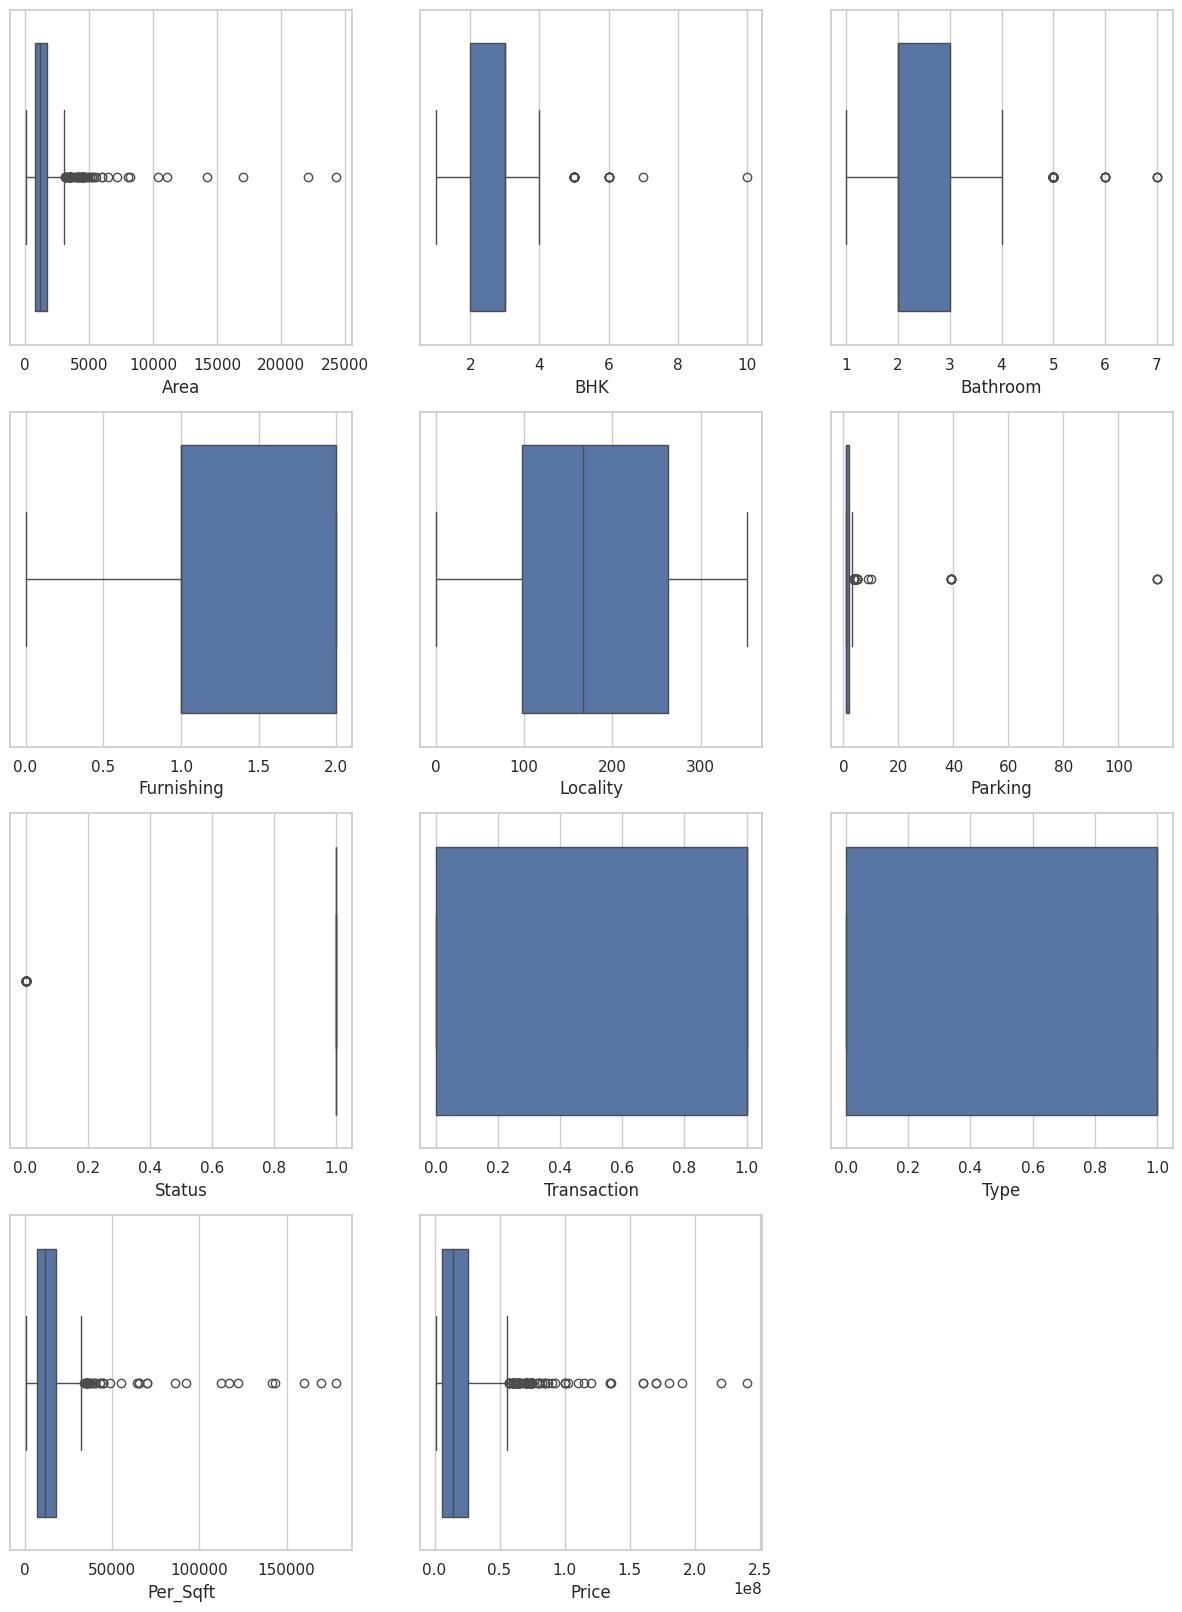

In [70]:
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.boxplot(x=df["Area"])

plt.subplot(4,3,2)
sns.boxplot(x=df["BHK"])

plt.subplot(4,3,3)
sns.boxplot(x=df["Bathroom"])

plt.subplot(4,3,4)
sns.boxplot(x=df["Furnishing"])

plt.subplot(4,3,5)
sns.boxplot(x=df["Locality"])

plt.subplot(4,3,6)
sns.boxplot(x=df["Parking"])

plt.subplot(4,3,7)
sns.boxplot(x=df["Status"])

plt.subplot(4,3,8)
sns.boxplot(x=df["Transaction"])

plt.subplot(4,3,9)
sns.boxplot(x=df["Type"])

plt.subplot(4,3,10)
sns.boxplot(x=df["Per_Sqft"])

plt.subplot(4,3,11)
sns.boxplot(x=df["Price"])

plt.show()

In [71]:
df.shape

(1122, 11)

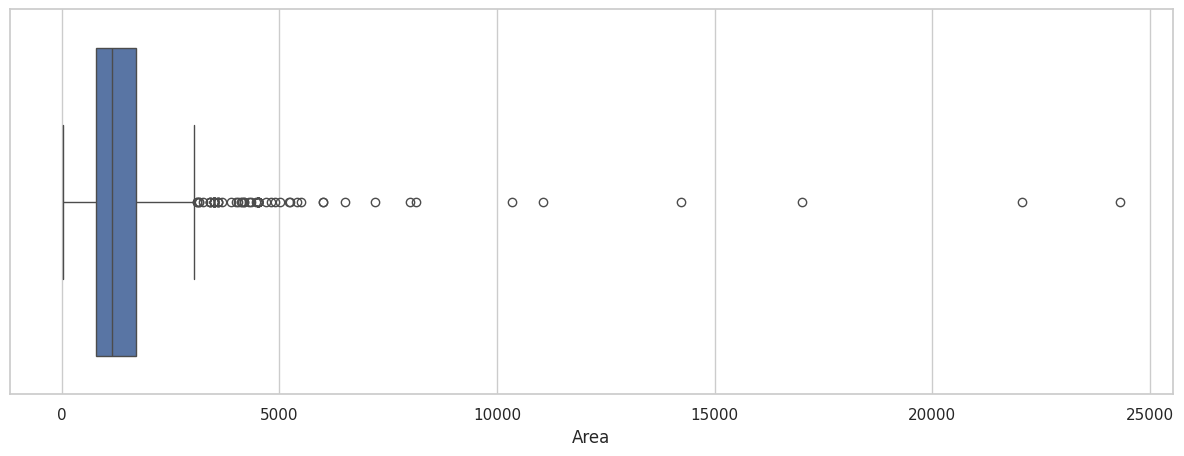

In [72]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Area",data=df)
plt.show()

In [74]:
q1=df["Area"].quantile(0.25)
q3=df["Area"].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

q1,q3,iqr,min_range,max_range

(np.float64(800.0),
 np.float64(1700.0),
 np.float64(900.0),
 np.float64(-550.0),
 np.float64(3050.0))

In [75]:
df1=df[df["Area"]<=max_range]

In [76]:
df1.shape

(1062, 11)

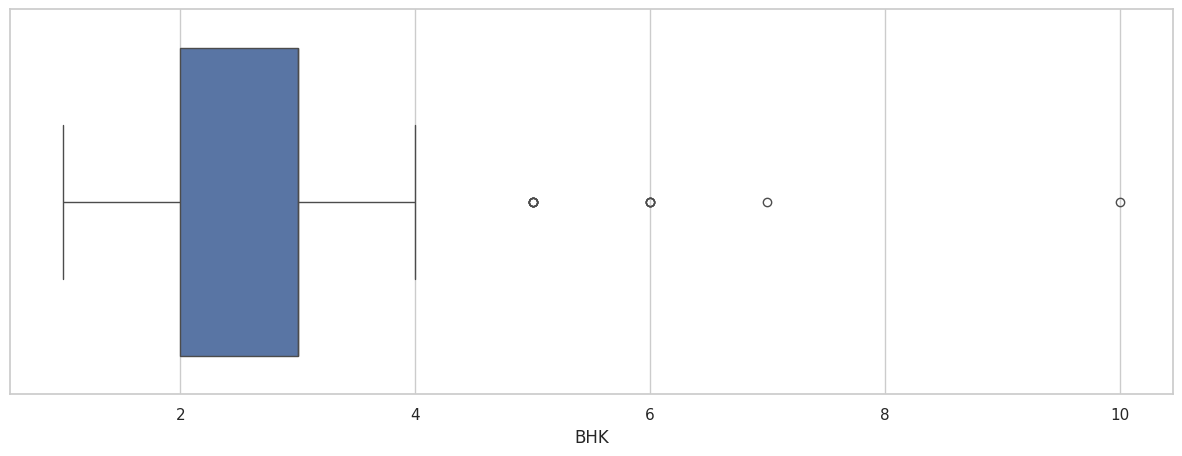

In [77]:
plt.figure(figsize=(15,5))
sns.boxplot(x="BHK",data=df1)
plt.show()

In [78]:
q1=df1["BHK"].quantile(0.25)
q3=df1["BHK"].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

q1,q3,iqr,min_range,max_range

(np.float64(2.0),
 np.float64(3.0),
 np.float64(1.0),
 np.float64(0.5),
 np.float64(4.5))

In [79]:
df1=df1[df1["BHK"]<=max_range]

In [80]:
df1.shape

(1050, 11)

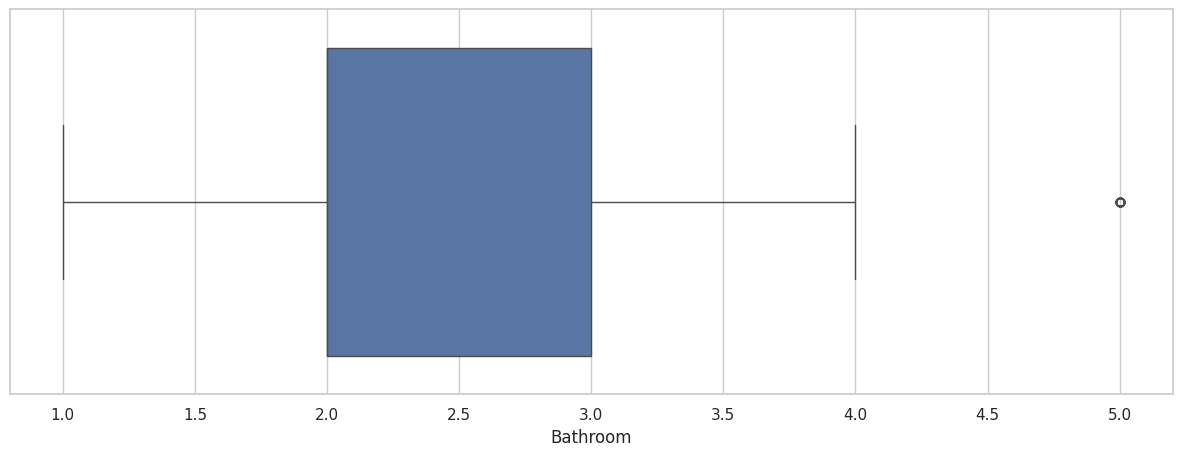

In [81]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Bathroom",data=df1)
plt.show()

In [82]:
q1=df1["Bathroom"].quantile(0.25)
q3=df1["Bathroom"].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

q1,q3,iqr,min_range,max_range

(np.float64(2.0),
 np.float64(3.0),
 np.float64(1.0),
 np.float64(0.5),
 np.float64(4.5))

In [83]:
df1=df1[df1["Bathroom"]<=max_range]

In [84]:
df1.shape

(1018, 11)

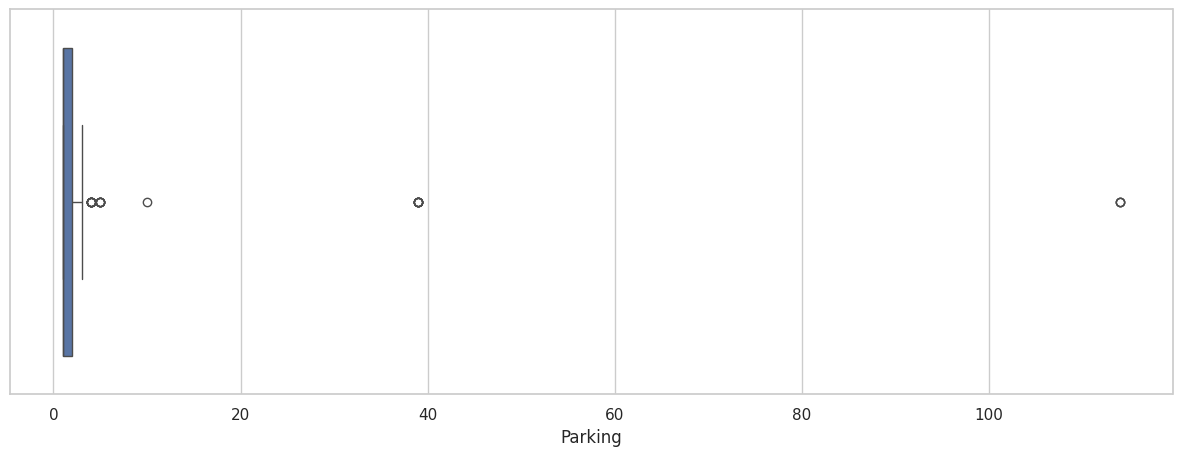

In [85]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Parking",data=df1)
plt.show()

In [86]:
q1=df1["Parking"].quantile(0.25)
q3=df1["Parking"].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

q1,q3,iqr,min_range,max_range

(np.float64(1.0),
 np.float64(2.0),
 np.float64(1.0),
 np.float64(-0.5),
 np.float64(3.5))

In [87]:
df1=df1[df1["Parking"]<=max_range]

In [88]:
df1.shape

(992, 11)

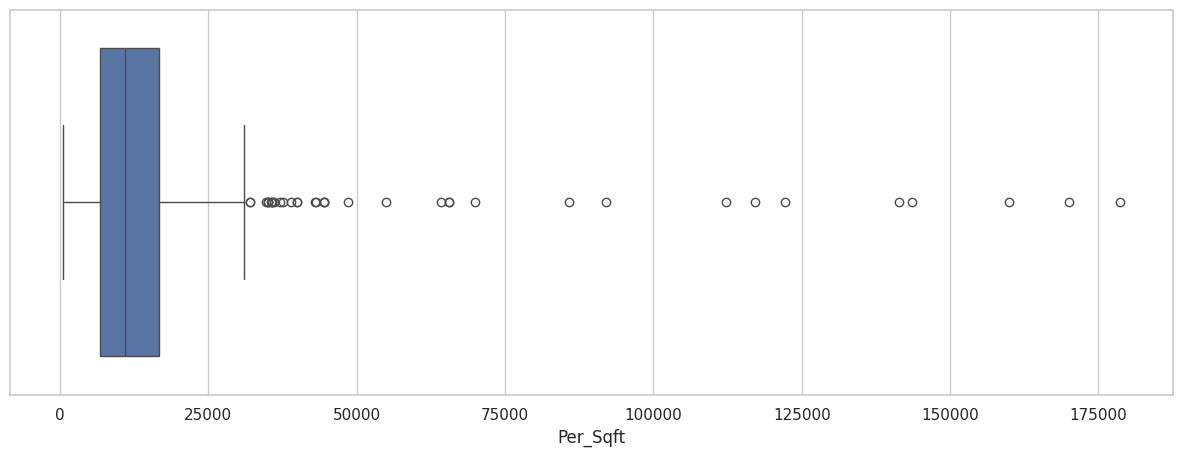

In [89]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Per_Sqft",data=df1)
plt.show()

In [90]:
q1=df1["Per_Sqft"].quantile(0.25)
q3=df1["Per_Sqft"].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

q1,q3,iqr,min_range,max_range

(np.float64(6666.0),
 np.float64(16666.0),
 np.float64(10000.0),
 np.float64(-8334.0),
 np.float64(31666.0))

In [91]:
df1=df1[df1["Per_Sqft"]<=max_range]

In [92]:
df1.shape

(956, 11)

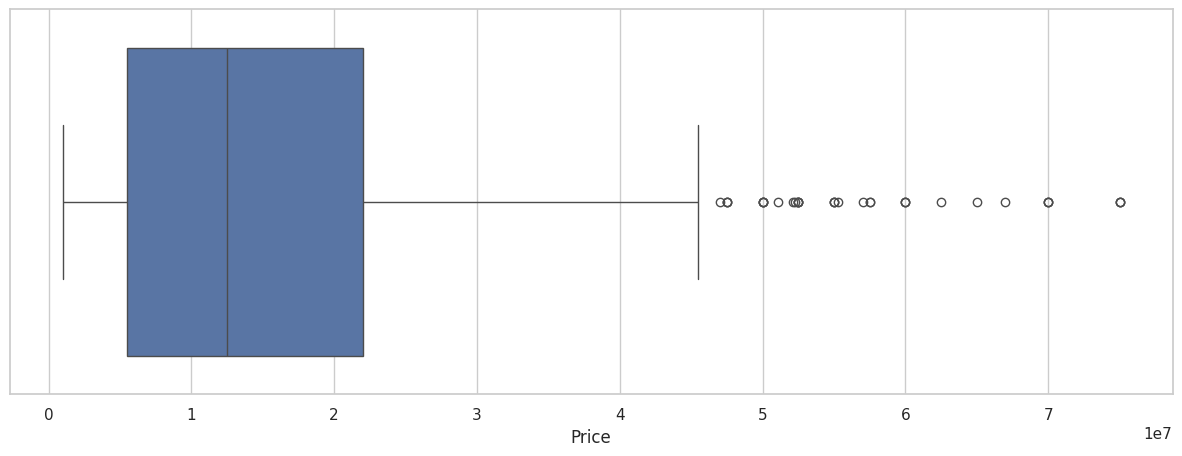

In [93]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Price",data=df1)
plt.show()

In [94]:
q1=df1["Price"].quantile(0.25)
q3=df1["Price"].quantile(0.75)
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)

q1,q3,iqr,min_range,max_range

(np.float64(5500000.0),
 np.float64(22000000.0),
 np.float64(16500000.0),
 np.float64(-19250000.0),
 np.float64(46750000.0))

In [95]:
df1=df1[df1["Price"]<=max_range]

In [96]:
df1.shape

(922, 11)

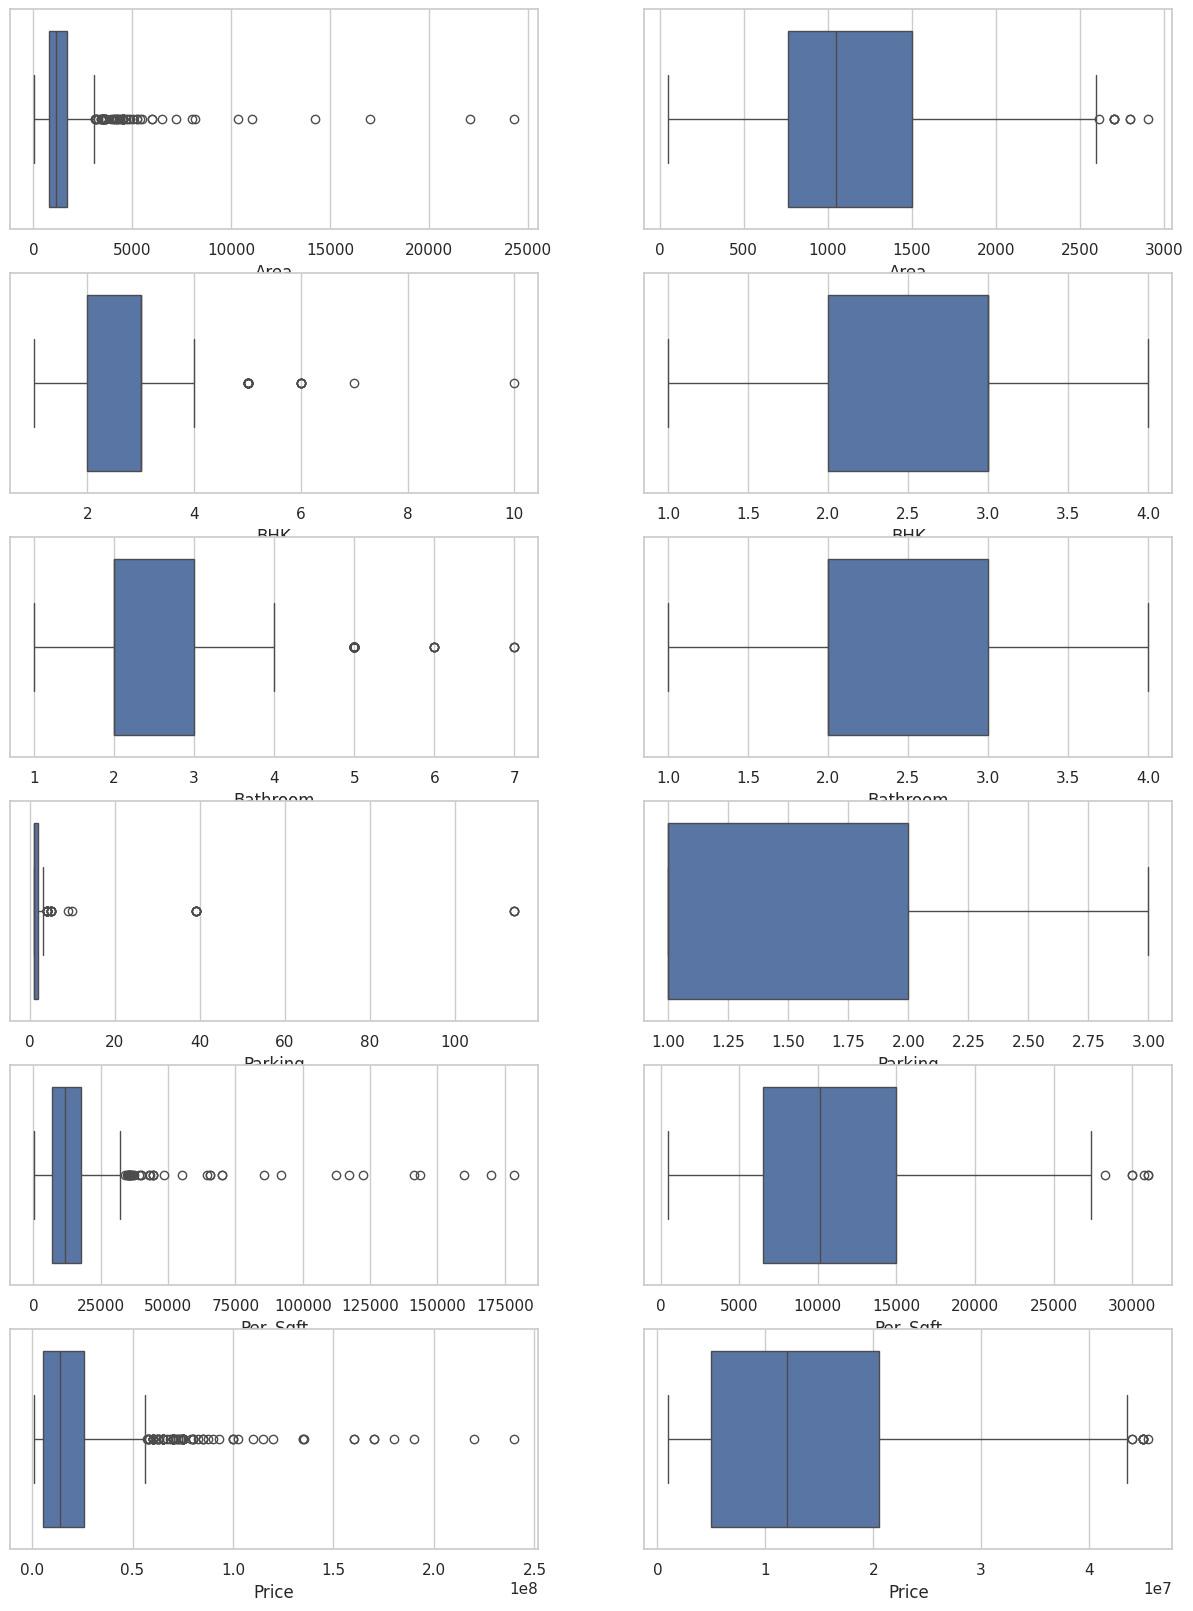

In [97]:
plt.figure(figsize=(15,20))
plt.subplot(6,2,1)
sns.boxplot(x=df["Area"])
plt.subplot(6,2,2)
sns.boxplot(x=df1["Area"])

plt.subplot(6,2,3)
sns.boxplot(x=df["BHK"])
plt.subplot(6,2,4)
sns.boxplot(x=df1["BHK"])

plt.subplot(6,2,5)
sns.boxplot(x=df["Bathroom"])
plt.subplot(6,2,6)
sns.boxplot(x=df1["Bathroom"])

plt.subplot(6,2,7)
sns.boxplot(x=df["Parking"])
plt.subplot(6,2,8)
sns.boxplot(x=df1["Parking"])

plt.subplot(6,2,9)
sns.boxplot(x=df["Per_Sqft"])
plt.subplot(6,2,10)
sns.boxplot(x=df1["Per_Sqft"])

plt.subplot(6,2,11)
sns.boxplot(x=df["Price"])
plt.subplot(6,2,12)
sns.boxplot(x=df1["Price"])

plt.show()

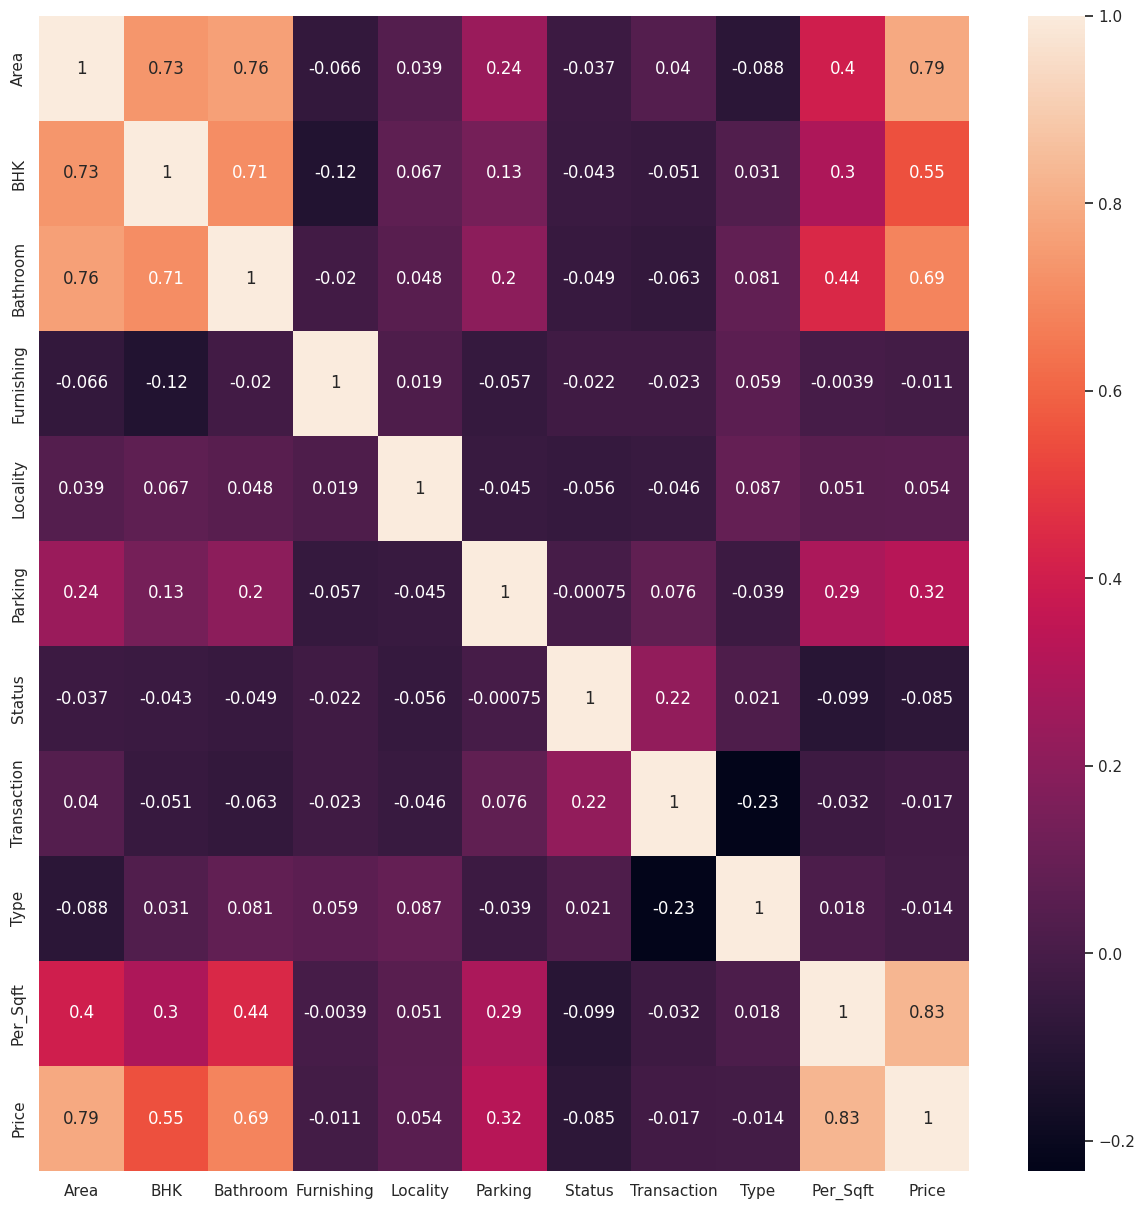

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df1.corr(),annot=True)
plt.show()

In [99]:
df1.head(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,800,3,2,1,274,1,1,0,1,8125,6500000
1,750,2,2,1,135,1,1,0,0,6666,5000000
2,950,2,2,0,49,1,1,1,0,16315,15500000


![image-5.png](attachment:image-5.png)

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Train The Data</h2>

</div>

In [100]:
x=df1.iloc[:,:-1]
y=df1["Price"]

In [101]:
x.head(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
0,800,3,2,1,274,1,1,0,1,8125
1,750,2,2,1,135,1,1,0,0,6666
2,950,2,2,0,49,1,1,1,0,16315


In [102]:
x.tail(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
1255,1050,3,2,1,44,3,1,1,1,11904
1256,875,3,3,1,44,3,1,0,1,20000
1257,990,2,2,2,45,1,1,1,1,11616


In [103]:
y.head(3)

,Price
0,6500000
1,5000000
2,15500000


In [104]:
y.tail(3)

,Price
1255,12500000
1256,17500000
1257,11500000


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<div style="background-color: #FCD299; padding: 20px; border-radius: 15px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #ffffff; font-size: 30px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Apply Machine Learning Regression Models</h2>

</div>

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Linear Regression</h2>

</div>

In [108]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [109]:
lr.score(x_test,y_test)*100

93.23856692159498

In [110]:
lr.score(x_train,y_train)*100

94.60702131281151

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Decision Tree</h2>

</div>

In [111]:
dt=DecisionTreeRegressor(max_depth=11,random_state=42)

In [112]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

In [113]:
dt.score(x_test,y_test)*100

97.03762456019948

In [114]:
dt.score(x_train,y_train)*100

99.9962278577032

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">K-Neighbors</h2>

</div>

In [115]:
kn=KNeighborsRegressor(n_neighbors=3)

In [116]:
kn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [117]:
kn.score(x_train,y_train)*100

97.91226797561005

In [118]:
kn.score(x_test,y_test)*100

95.92295693514855

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Random Forest</h2>

</div>

In [119]:
rf=RandomForestRegressor(n_estimators=17,random_state=42)

In [120]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=17, random_state=42)

In [121]:
rf.score(x_test,y_test)*100

99.44730303368287

In [122]:
rf.score(x_train,y_train)*100

99.82664817131528

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Check the models Accuracy using example</h2>

</div>

In [123]:
#800	3	2	1	274	1	1	0	1	8125           #6500000

In [124]:
lr.predict([[800,3,2,1,274,1,1,0,1,8125]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6286786.62176813])

In [125]:
dt.predict([[800,3,2,1,274,1,1,0,1,8125]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([6500000.])

In [126]:
kn.predict([[800,3,2,1,274,1,1,0,1,8125]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([7033333.33333333])

In [127]:
rf.predict([[800,3,2,1,274,1,1,0,1,8125]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6411764.70588235])

In [128]:
# 750	2	2	1	135	1	1	0	0	6666                  #5000000

In [129]:
lr.predict([[750,2,2,1,135,1,1,0,0,6666]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4570894.96701547])

In [130]:
dt.predict([[750,2,2,1,135,1,1,0,0,6666]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5000000.])

In [131]:
kn.predict([[750,2,2,1,135,1,1,0,0,6666]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([5033333.33333333])

In [132]:
rf.predict([[750,2,2,1,135,1,1,0,0,6666]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5076470.58823529])

In [133]:
#1050	3	2	1	44	3	1	1	1	11904             12500000

In [134]:
lr.predict([[1050,3,2,1,44,3,1,1,1,11904]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14136524.05779943])

In [135]:
dt.predict([[1050,3,2,1,44,3,1,1,1,11904]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([12700000.])

In [136]:
kn.predict([[1050,3,2,1,44,3,1,1,1,11904]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([13133333.33333333])

In [137]:
rf.predict([[1050,3,2,1,44,3,1,1,1,11904]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([12405882.35294118])

In [138]:
# 875	3	3	1	44	3	1	0	1	20000       #17500000

In [139]:
lr.predict([[875,3,3,1,44,3,1,0,1,20000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21643616.84065229])

In [140]:
dt.predict([[875,3,3,1,44,3,1,0,1,20000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([17500000.])

In [141]:
kn.predict([[875,3,3,1,44,3,1,0,1,20000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([17233333.33333333])

In [142]:
rf.predict([[875,3,3,1,44,3,1,0,1,20000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([16958823.52941176])

In [143]:
# 990	2	2	2	45	1	1	1	1	11616        11500000

In [144]:
lr.predict([[990,2,2,2,45,1,1,1,1,11616]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13295512.75695281])

In [145]:
dt.predict([[990,2,2,2,45,1,1,1,1,11616]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([11500000.])

In [146]:
kn.predict([[990,2,2,2,45,1,1,1,1,11616]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([10833333.33333333])

In [147]:
rf.predict([[990,2,2,2,45,1,1,1,1,11616]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11452941.17647059])

<div style="padding: 10px; border-radius: 10px; border: 2px solid #F0F8FF; font-family: 'Arial', sans-serif; box-shadow: 0px 2px 2px rgba(0, 0, 0, 0.2);">

<h2 style="text-align:center; color: #4c2882; font-size: 24px; font-weight: bold; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);">Check The Error</h2>

</div>

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [149]:
mean_squared_error(y_test,lr.predict(x_test)),mean_absolute_error(y_test,lr.predict(x_test))

(5989775141349.063, 1852894.6412762052)

In [150]:
mean_squared_error(y_test,dt.predict(x_test)),mean_absolute_error(y_test,dt.predict(x_test))

(2624290230030.0303, 884938.7387387387)

In [151]:
mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test))

(489619657720.0039, 418779.0143084262)

In [152]:
mean_squared_error(y_test,kn.predict(x_test)),mean_absolute_error(y_test,kn.predict(x_test))

(3611744864864.8647, 948324.3243243245)

Linear regression Accuracy : 93.2%




Descion tree Accuracy : 97%




Knn regresor Accuracy : 95.9%




Random forest Accuracy :99.45